In [38]:
import cv2
import matplotlib.pyplot as plt

In [39]:
pigs = cv2.imread('1.jpg', flags = cv2.IMREAD_GRAYSCALE)
# pigs = cv2.imread('1.jpg')
print(pigs.shape)

(266, 333)


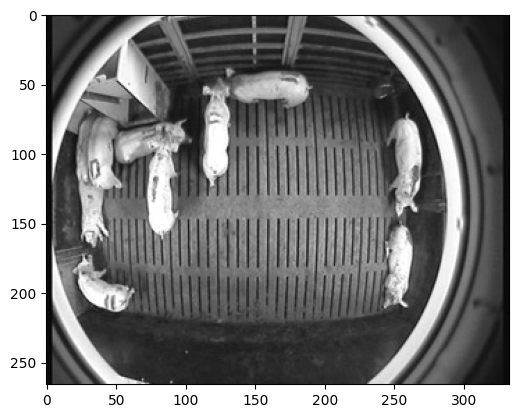

In [41]:
plt.imshow(pigs, cmap = 'gray');
# cv2.imshow(winname = '', mat = pigs)
# pigs[0: 100, 0: 100] = 0
# plt.imshow(pigs, cmap = 'gray');

In [42]:
dl, dr = 20, 60
du, dd = 30, 40
x = pigs[du: -dd, dl: -dr]
print(x.shape)

(196, 253)


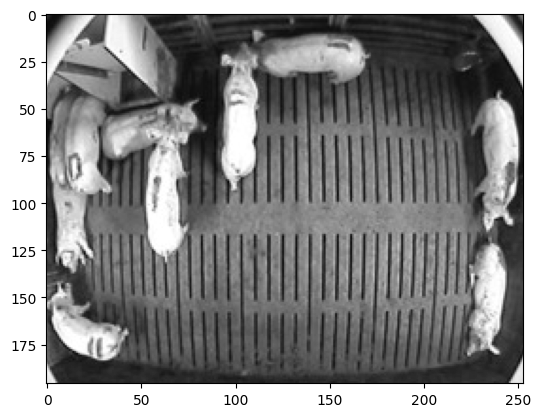

In [43]:
plt.imshow(x, cmap = 'gray')

### Histogram Equalization

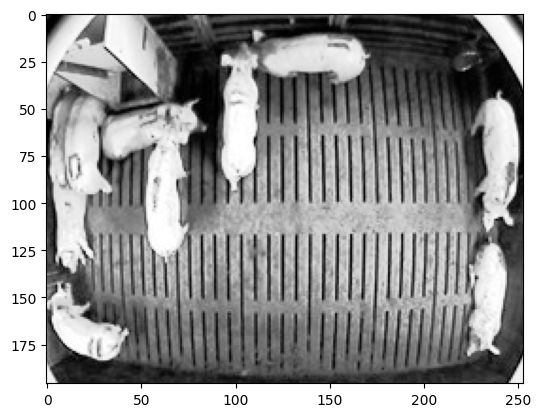

In [46]:
eq_x = cv2.equalizeHist(x)
plt.imshow(eq_x, cmap = 'gray') 

In [48]:
plt.hist(x);
plt.hist(eq_x)

### Gaussian Lowpass Filter

### Binarili